<a href="https://colab.research.google.com/github/roscibely/Animations-with-Matplotlib/blob/main/Controle_PID_de_Sistemas_Din%C3%A2micos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Controle PID de Sistemas Dinâmicos: Sistema de Segunda Ordem


A engenharia de controle de sistemas exige o conhecimento de pelo menos dois componentes básicos de um sistema: a **planta** (modelo matemático), que descreve o comportamento de seu sistema, e a saída, que é a meta que você está tentando alcançar. 


## 1.1 Observando um Sistema 

Um sistema pode ser composto de vários componentes, mas começaremos analisando os componentes e a funcionalidade de um sistema clássico em malha fechada (Figura). 

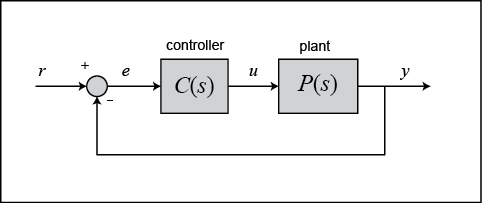

**Entrada - r**: A entrada **r** é algum tipo de valor/sinal de referência que deve ter uma correlação direta com a saída do sistema. (Pode ser uma fonte de tensão, uma configuração ou interruptor que conectará uma fonte de tensão ao sistema). 

**Error: e**: O erro do nosso sistema é igual a: entrada - saída ($e=r-y$). 

**Controlador: C(s)** - No nosso caso, este é o controlador PID que iremos projetar. Ele é posicionado antes da planta pela qual somos compensados ​​e logo após a junção do sinal de entrada e feedback.

**Planta: P(s)** - Todos os subsistemas são expressos matematicamente como uma função de transferência. Se o que você está tentando controlar é um motor DC, então a planta é, na verdade, seu motor DC. Sua entrada fará com que a planta reaja de uma forma que fornecerá um valor de saída idealmente próximo de sua entrada.
 
**Saída: y** - Esta variável é a resposta real do sistema à nossa resposta desejada (a entrada) que passou por nosso sistema montado (planta). O desempenho do sistema é julgado pela comparação da saída com a entrada, visto que certos erros ocorrerão.

Portanto, a função transferência em malha fechada do sistema na figura acima é dada por, 
$$\frac{R(s)}{Y(s)}= \frac{C(s)\cdot G(s)}{1+C(s)\cdot G(s)} $$

## 1.2 Definição de controle PID 

Um controlador PID é na verdade um sistema com três partes:

  * Controlador proporcional: a principal função do compensador proporcional é introduzir um ganho proporcional à leitura do erro que é produzida pela comparação da saída e da entrada do sistema ($u=K_p\cdot e$).
     
  * Controlador derivativo: em um sistema de realimentação unitário, o compensador derivativo irá introduzir a derivada do sinal erro ($e$) multiplicada por um ganho $K_D$. Em outras palavras, a inclinação da forma de onda do sinal erro é o que será introduzido na saída. Seu objetivo principal é melhorar a resposta transitória de todo o sistema em malha fechada.
 
  * Controlador integral: em um sistema de feedback unitário, o compensador integral introduzirá a integral do sinal de erro multiplicada por um ganho $K_I$. Isso significa que a área sob a curva do sinal de erro afetará o sinal de saída. Assim o controlador melhorará o erro de estado estacionário do sistema geral em malha fechada. 


\begin{array}{c|c|c}
Controlador & \text{Domínio do tempo} & \text{Domínio da frequência - S} \\
Proportional & K_Pe(t)  & K_P   \\
Derivativo & K_D\frac{d}{dt}e(t) & K_Ds   \\ 
Integrativo & K_I \int_0^t e(t) dt & \frac{K_I}{s}                                                       
\end{array}

Portanto, um controlador PID pode ser descrito matematicamente como: 

\begin{array}{c|c|c}
Controlador & \text{Domínio do tempo} & \text{Domínio da frequência - S} \\
PID & K_Pe(t)+K_D\frac{d}{dt}e(t) +K_I \int_0^t e(t)  & K_P+K_Ds+\frac{K_I}{s}   \\
                                                    
\end{array}

Por nenhuma outra razão além da simplicidade, pode-se ver porque o domínio $s$ é usado exclusivamente para analisar ou projetar sistemas análogos - trabalhar com frações é sempre mais fácil do que fazer integração e/ou derivadas. 


## 1.3 Sistema de segunda ordem e características de saída 
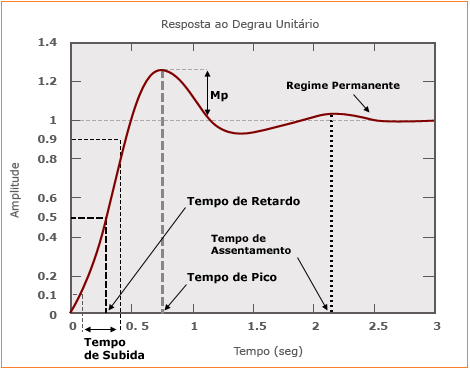


Agora que sabemos do que é feito um sistema e como aplicaremos nosso controlador PID, podemos começar a falar sobre as características do nosso sinal de saída (afinal, é isso que estamos monitorando e tentando controlar). 

\begin{array}{c|c|c}
Característica      & Equação   \\
\text{Equação Geral (sistema de 2ª ordem)} & P(s)=\frac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n}\\                                            
\end{array}
Esta equação geral $P(s)$ ajudará a descrever o comportamento de uma função de segunda ordem típica sem zeros. No entanto, nem todas as funções de transferência são ou serão de segunda ordem e muitas conterão zeros.

\begin{array}{c|c|c}
\text{Máximo sobressinal (Overshoot)} & M_p(\%) = 100 e^{-\frac{\zeta \pi}{\sqrt{ 1-\zeta^2}}} \\                                            
\end{array}
Este valor descreverá a porcentagem na qual a forma de onda da saída ultrapassa (ou supera) seu valor final/estado estacionário. É expresso como uma porcentagem do valor final. 

\begin{array}{c|c|c}
\text{Taxa de Amortecimento (Damping ratio)} & \zeta= \frac{-ln(M_p/100)}{\sqrt{\pi^2 +ln^2(M_p/100)}}\\                                            
\end{array}
É importante observar que a equação da taxa de amortecimento depende exclusivamente do overshoot. A proporção irá descrever se um sistema está sem amortecimento ($\zeta=$ 0), subamortecido ($0 <\zeta< 1$), criticamente amortecido ($\zeta=1$) ou superamortecido ($\zeta>1$). 

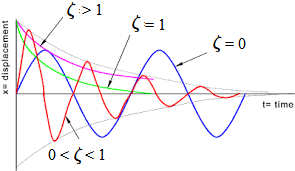


\begin{array}{c|c|c}
\text{Tempo de Pico (Peak-Time)} & T_p = \frac{\pi}{\omega_n \sqrt{1-\zeta^2}}\\                                            
\end{array}
Este é o tempo (em segundos) para que a saída do sistema alcance seu valor máximo ou pico. 

\begin{array}{c|c|c}
\text{Tempo de acomodação/assentamento (Settling-Time)} & T_s=\frac{4}{\zeta\omega_n}\\                                            
\end{array}
O tempo que a saída leva para se estabilizar em $+/- 2\%$ do valor final/estado estacionário. Como as oscilações podem continuar indefinidamente (embora menores), isso não exige que a saída se estabilize absolutamente. 
 



## 1.4 Projeto de controlador em Python 


In [ ]:
#!pip install slycot   # optional
!pip install control

In [2]:
import numpy as np
import control as control
import matplotlib.pyplot as plt
from control.matlab import *           # package for control theory calculations

### 1.4.1 Definindo a planta

Considere o sistema: 
 $$\frac{Y(s)}{R(s)}= \frac{1}{s(s+4)} $$

In [3]:
num=[1];            # numerador
d=[1, 4,0];         # denominador
Ps=control.tf(num,d)# função transferência  
print('Sistema:',Ps)       

Sistema: 
    1
---------
s^2 + 4 s



### 1.4.2 Sistema em malha fechada

In [4]:
Ts=feedback(Ps,1) 
print(Ts)


      1
-------------
s^2 + 4 s + 1



### 1.4.3 Análise da função de transferência da planta com a função **sistool()**

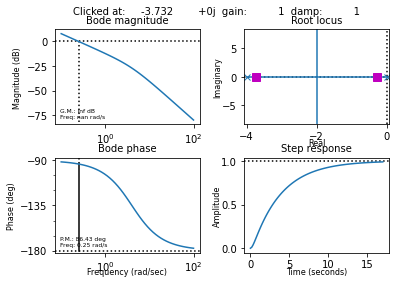

In [5]:
sisotool(Ps)  # Observe que estamos executando sisotool() considerando a 
              # função de transferencia em malha aberta (Ps)

### 1.4.4 Controlador propocional 

---



{'Overshoot': 0.0,
 'Peak': 0.9909167857812844,
 'PeakTime': 2.279559242064105,
 'RiseTime': 1.2433959502167844,
 'SettlingMax': 0.9909167857812844,
 'SettlingMin': 0.8963265384090292,
 'SettlingTime': 1.980223179974879,
 'SteadyStateValue': 0.9909167857812844,
 'Undershoot': 0.0}

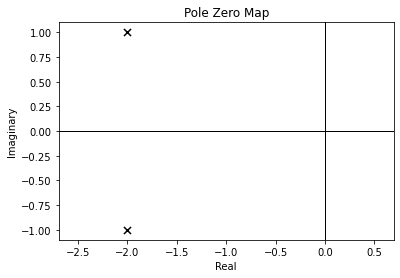

In [6]:
Kp=5;                # Kp conforme dado por meio da análise siso 
Ps1=Kp*Ps            # Multiplicando Kp com planta 
Ts1=feedback(Ps1,1)  # Controlador x sistema em malha fechada
pzmap(Ts1)           # Diagrama de polos e zeros
stepinfo(Ts1)  

Analisando os resultados 

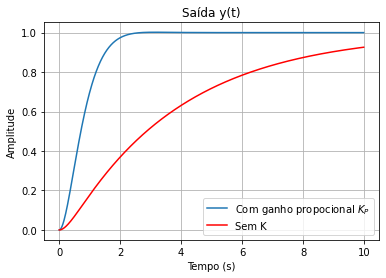

In [14]:
tf = 10.00                # Tempo de simulação em segundos 
dt = 0.01                 # step
T = np.arange(0, tf, dt)  # Vetor de tempos

saida_com_K, t =step(Ts1,T) # Com ganho propocional Kp
saida_sem_K, t1 =step(Ts,T) # Saida com sistema em malha fechada (MF) sem Kp
plt.plot(t,saida_com_K)
plt.plot(t1,saida_sem_K, 'r')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Saída y(t)')
plt.legend(['Com ganho propocional $K_P$','Sem K'])
plt.grid(True)

### 1.4.5 Controlador Propocional Derivativo (PD) 

---



In [15]:
Tp=2.27955 
Tp_goal=1.76 
Mp = 30 
zeta=-np.log(Mp/100)/np.sqrt(np.pi**2+(np.log(Mp/100))**2);
w=np.pi/(Tp_goal*np.sqrt(1-(zeta**2)))  


   0.5 s + 8
---------------
s^2 + 4.5 s + 8



{'Overshoot': 0.3065006426664156,
 'Peak': 1.0164853925222597,
 'PeakTime': 1.7601983821998923,
 'RiseTime': 0.8800991910999462,
 'SettlingMax': 1.0164853925222597,
 'SettlingMin': 0.9178177555503649,
 'SettlingTime': 1.3303824981743373,
 'SteadyStateValue': 1.0133793782153806,
 'Undershoot': 0.0}

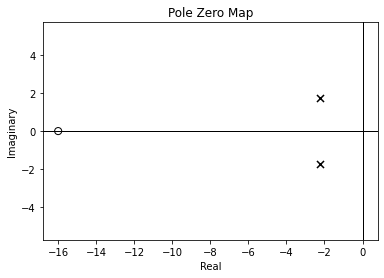

In [16]:
Kd=0.5
PD=control.tf([Kd, 8],[1])# função transferência do controlador PD  
Ps2=PD*Ps                 # Multiplicando a TF do controlador com planta 
Ts2=feedback(Ps2,1)       # Controlador * sistema em malha fechada
print(Ts2)
pzmap(Ts2)                # Diagrama de polos e zeros
stepinfo(Ts2) 

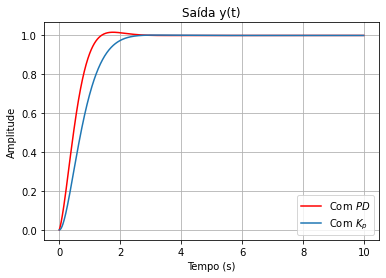

In [17]:
saida_com_PD, t =step(Ts2,T) # Com ganho propocional Kp
plt.plot(t1,saida_com_PD, 'r')
plt.plot(t,saida_com_K)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Saída y(t)')
plt.legend(['Com $PD$','Com $K_p$'])
plt.grid(True)

## 1.4.6 Controlador Propocional Integrativo (PI)

---




       11 s + 5
----------------------
s^3 + 4 s^2 + 11 s + 5



{'Overshoot': 26.497532914072405,
 'Peak': 1.2682612775415796,
 'PeakTime': 1.2285194312400138,
 'RiseTime': 0.48072499483304887,
 'SettlingMax': 1.2682612775415796,
 'SettlingMin': 0.913736790908305,
 'SettlingTime': 4.433352730127007,
 'SteadyStateValue': 1.002597638329506,
 'Undershoot': 0.0}

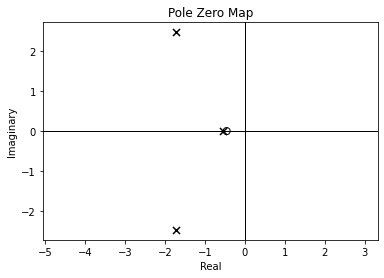

In [18]:
KI=11
PI=control.tf([KI, Kp],[1, 0])
P=PI*Ps                 # Multiplicando a TF do controlador com planta 
FT=feedback(P,1)       # Controlador * sistema em malha fechada
print(FT)
pzmap(FT)  
stepinfo(FT) 

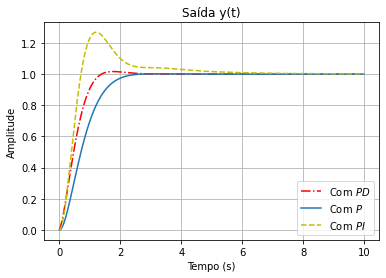

In [25]:
saida_com_PI, t =step(FT,T) # Com PI
plt.plot(t1,saida_com_PD, 'r-.')
plt.plot(t,saida_com_K)
plt.plot(t,saida_com_PI, 'y--')
#plt.axhline(y=saida_com_PI[-1], c='g') 
#plt.axhline(y=saida_com_PI.max(), c='g') 
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Saída y(t)')
plt.grid(True)
plt.legend(['Com $PD$','Com $P$', 'Com $PI$'])
